In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd


In [2]:
movies_df = pd.read_csv('movies.csv')
ratings_df = pd.read_csv('ratings.csv')
tags_df = pd.read_csv('tags.csv')
links_df = pd.read_csv('links.csv')

In [3]:
ratings_movies_df = pd.merge(movies_df, ratings_df, on='movieId')

ratings_movies_df.isnull().sum()

ratings_movies_df['date_transformed'] = pd.to_datetime(ratings_movies_df['timestamp'], unit='s')


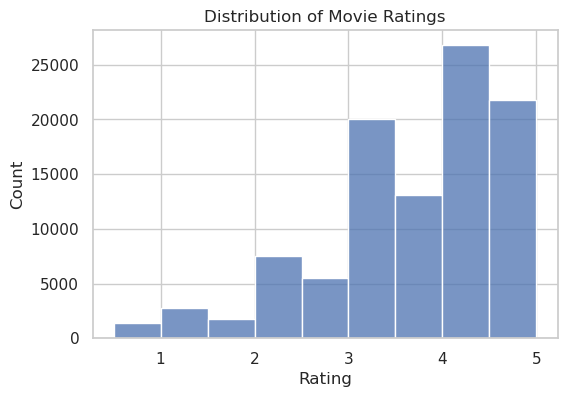

In [7]:
plt.figure(figsize=(6, 4))
sns.set(style="whitegrid")

sns.histplot(ratings_movies_df['rating'], bins=9, kde=False)

plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')

plt.show()

In [8]:
movie_ratings = ratings_movies_df.groupby('title').agg({'rating': ['mean', 'count']})

movie_ratings.columns = ['Average Rating', 'Number of Ratings']

top_movies = movie_ratings.sort_values(by=['Average Rating', 'Number of Ratings'], ascending=False)

top_movies.head(10)

,Average Rating,Number of Ratings
title,,
Belle époque (1992),5.0,2
Come and See (Idi i smotri) (1985),5.0,2
Enter the Void (2009),5.0,2
Heidi Fleiss: Hollywood Madam (1995),5.0,2
Jonah Who Will Be 25 in the Year 2000 (Jonas qui aura 25 ans en l'an 2000) (1976),5.0,2
Lamerica (1994),5.0,2
Lesson Faust (1994),5.0,2
'Salem's Lot (2004),5.0,1
12 Angry Men (1997),5.0,1


In [9]:
min_ratings_threshold = 50

popular_movies = top_movies[top_movies['Number of Ratings'] > min_ratings_threshold]

popular_movies_sorted = popular_movies.sort_values(by='Number of Ratings', ascending=False)

popular_movies_sorted.head(10)

,Average Rating,Number of Ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


In [10]:
user_engagement = ratings_df.groupby('userId').size().sort_values(ascending=False)

user_engagement_df = user_engagement.reset_index(name='Number of Ratings')

user_engagement_df.head(10)

,userId,Number of Ratings
0,414,2698
1,599,2478
2,474,2108
3,448,1864
4,274,1346
5,610,1302
6,68,1260
7,380,1218
8,606,1115
9,288,1055


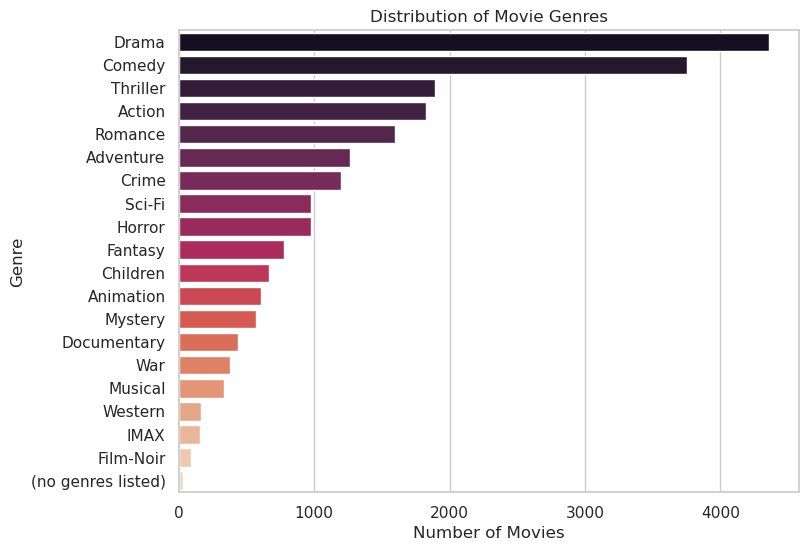

In [11]:
genres_expanded = movies_df['genres'].str.split('|', expand=True).stack()
genres_expanded.index = genres_expanded.index.droplevel(-1)
genres_expanded.name = 'Genre'
genre_df = movies_df.join(genres_expanded)

genre_count = genre_df['Genre'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=genre_count.values, y=genre_count.index, palette="rocket")

plt.title('Distribution of Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')

plt.show()


# Cosine Similarities

In [12]:
user_item_matrix = ratings_movies_df.pivot_table(index='userId', columns='title', values='rating')

user_item_matrix_filled = user_item_matrix.fillna(0)

user_similarity = cosine_similarity(user_item_matrix_filled)

user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix_filled.index, columns=user_item_matrix_filled.index)

user_similarity_df.head(5)

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.027283,0.059720,0.194395,0.129080,0.128152,0.158744,0.136968,0.064263,0.016875,...,0.080554,0.164455,0.221486,0.070669,0.153625,0.164191,0.269389,0.291097,0.093572,0.145321
2,0.027283,1.000000,0.000000,0.003726,0.016614,0.025333,0.027585,0.027257,0.000000,0.067445,...,0.202671,0.016866,0.011997,0.000000,0.000000,0.028429,0.012948,0.046211,0.027565,0.102427
3,0.059720,0.000000,1.000000,0.002251,0.005020,0.003936,0.000000,0.004941,0.000000,0.000000,...,0.005048,0.004892,0.024992,0.000000,0.010694,0.012993,0.019247,0.021128,0.000000,0.032119
4,0.194395,0.003726,0.002251,1.000000,0.128659,0.088491,0.115120,0.062969,0.011361,0.031163,...,0.085938,0.128273,0.307973,0.052985,0.084584,0.200395,0.131746,0.149858,0.032198,0.107683
5,0.129080,0.016614,0.005020,0.128659,1.000000,0.300349,0.108342,0.429075,0.000000,0.030611,...,0.068048,0.418747,0.110148,0.258773,0.148758,0.106435,0.152866,0.135535,0.261232,0.060792


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
from sklearn.metrics import mean_squared_error

train_data, test_data = train_test_split(ratings_movies_df, test_size=0.2, random_state=42)

train_data_matrix = train_data.pivot_table(index='userId', columns='title', values='rating').fillna(0)
test_data_matrix = test_data.pivot_table(index='userId', columns='title', values='rating').fillna(0)

train_user_similarity = cosine_similarity(train_data_matrix)

train_user_similarity_df = pd.DataFrame(train_user_similarity, index=train_data_matrix.index, columns=train_data_matrix.index)

def predict_ratings(user_similarity, user_item_matrix):
    mean_user_rating = user_item_matrix.mean(axis=1)
    ratings_diff = (user_item_matrix - mean_user_rating[:, np.newaxis])
    pred = mean_user_rating[:, np.newaxis] + user_similarity.dot(ratings_diff) / np.array([np.abs(user_similarity).sum(axis=1)]).T
    return pred

user_rating_prediction = predict_ratings(train_user_similarity, train_data_matrix.values)

def mse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten()
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return mean_squared_error(prediction, ground_truth)

test_data_matrix_values = test_data_matrix.values
mse_value = mse(user_rating_prediction, test_data_matrix_values)

print("MSE:", mse_value)

def recommendations(user_id, user_similarity_df, user_item_matrix, top_n=100):
    if user_id not in user_similarity_df.index:
        return pd.DataFrame(columns=['title', 'predicted_rating'])

    similar_users = user_similarity_df[user_id].sort_values(ascending=False)[1:top_n+1].index
    similar_users_ratings = user_item_matrix.loc[similar_users]

    predicted_ratings = similar_users_ratings.mean(axis=0)
    recommendations = pd.DataFrame({'predicted_rating': predicted_ratings}).reset_index()

    threshold_rating = 0.5
    recommendations_filtered = recommendations[recommendations['predicted_rating'] > threshold_rating]

    return recommendations_filtered.sort_values(by='predicted_rating', ascending=False).head(10)

user_id = 1
combined_recommendations_df = recommendations(user_id, train_user_similarity_df, train_data_matrix)
print(combined_recommendations_df)


MSE: 12.243382942846829
                                                  title  predicted_rating
7393          Star Wars: Episode IV - A New Hope (1977)             3.480
7394  Star Wars: Episode V - The Empire Strikes Back...             3.390
7395  Star Wars: Episode VI - Return of the Jedi (1983)             3.050
5080                                 Matrix, The (1999)             2.755
2917                                Forrest Gump (1994)             2.725
373                              American Beauty (1999)             2.640
6406  Raiders of the Lost Ark (Indiana Jones and the...             2.615
6331                                Pulp Fiction (1994)             2.570
683                           Back to the Future (1985)             2.570
2711                                       Fargo (1996)             2.520


# NMF

In [26]:
from surprise import Dataset, Reader, NMF, accuracy
from surprise.model_selection import train_test_split

reader = Reader(rating_scale=(ratings_movies_df['rating'].min(), ratings_movies_df['rating'].max()))
data = Dataset.load_from_df(ratings_movies_df[['userId', 'title', 'rating']], reader)

trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

nmf_model = NMF(n_factors=15, random_state=42)
nmf_model.fit(trainset)

predictions = nmf_model.test(testset)
mse = accuracy.mse(predictions)
print("MSE with NMF:", mse)

def get_top_n_recommendations_nmf(model, trainset, user_id, n=10):
    user_inner_id = trainset.to_inner_uid(user_id)
    rated_items = set([j for (j, _) in trainset.ur[user_inner_id]])
    predictions = []

    for item_inner_id in trainset.all_items():
        if item_inner_id not in rated_items:
            item_raw_id = trainset.to_raw_iid(item_inner_id)
            prediction = model.predict(user_id, item_raw_id)
            predictions.append((item_raw_id, prediction.est))

    predictions.sort(key=lambda x: x[1], reverse=True)
    return predictions[:n]

user_id = 1  
top_recommendations = get_top_n_recommendations_nmf(nmf_model, trainset, user_id, n=10)

print(f"Top 10 Recommendations for User {user_id}:")
for movie_id, predicted_rating in top_recommendations:
    print(f"Movie: {movie_id}, Predicted Rating: {predicted_rating}")


MSE: 0.8362
MSE with NMF: 0.8361618401171429
Top 10 Recommendations for User 1:
Movie: Killing, The (1956), Predicted Rating: 5.0
Movie: Godfather, The (1972), Predicted Rating: 5.0
Movie: Dragon Ball Z: Bardock - The Father of Goku (Doragon bôru Z: Tatta hitori no saishuu kessen - Furiiza ni itonda Z senshi Kakarotto no chichi) (1990), Predicted Rating: 5.0
Movie: Great Escape, The (1963), Predicted Rating: 5.0
Movie: In Bruges (2008), Predicted Rating: 5.0
Movie: Shawshank Redemption, The (1994), Predicted Rating: 5.0
Movie: 5 Centimeters per Second (Byôsoku 5 senchimêtoru) (2007), Predicted Rating: 5.0
Movie: My Left Eye Sees Ghosts (Ngo joh aan gin diy gwai) (2002), Predicted Rating: 5.0
Movie: Inside Job (2010), Predicted Rating: 5.0
Movie: Star Wars: Episode IV - A New Hope (1977), Predicted Rating: 5.0


# SVD

In [8]:
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import train_test_split

reader = Reader(rating_scale=(ratings_movies_df['rating'].min(), ratings_movies_df['rating'].max()))
data = Dataset.load_from_df(ratings_movies_df[['userId', 'title', 'rating']], reader)

trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

svd_model = SVD(n_factors=15, random_state=42)
svd_model.fit(trainset)

predictions = svd_model.test(testset)

mse = accuracy.mse(predictions)
print("MSE with SVD:", mse)

def get_top_n_recommendations(model, trainset, user_id, n=10):
    inner_user_id = trainset.to_inner_uid(user_id)

    all_movie_ids = trainset.all_items()

    predicted_ratings = []
    for movie_id in all_movie_ids:
        inner_movie_id = trainset.to_raw_iid(movie_id)
        actual_rating = trainset.ur[inner_user_id][movie_id] if movie_id in trainset.ur[inner_user_id] else None
        if actual_rating is None:
            prediction = model.predict(user_id, inner_movie_id)
            predicted_ratings.append((inner_movie_id, prediction.est))

    predicted_ratings.sort(key=lambda x: x[1], reverse=True)
    top_n_recommendations = predicted_ratings[:n]

    return top_n_recommendations

user_id = 1
top_recommendations = get_top_n_recommendations(svd_model, trainset, user_id, n=10)
print("Top 10 Recommendations for User {}:".format(user_id))
for movie_id, rating in top_recommendations:
    print("Movie:", movie_id, "Predicted Rating:", rating)


MSE: 0.7524
MSE with SVD: 0.7523578847377924
Top 10 Recommendations for User 1:
Movie: Great Escape, The (1963) Predicted Rating: 5.0
Movie: Shawshank Redemption, The (1994) Predicted Rating: 5.0
Movie: Cool Hand Luke (1967) Predicted Rating: 5.0
Movie: Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964) Predicted Rating: 5.0
Movie: Grand Day Out with Wallace and Gromit, A (1989) Predicted Rating: 5.0
Movie: Streetcar Named Desire, A (1951) Predicted Rating: 5.0
Movie: Lawrence of Arabia (1962) Predicted Rating: 5.0
Movie: Departed, The (2006) Predicted Rating: 4.98652945317452
Movie: Fight Club (1999) Predicted Rating: 4.9802875855879485
Movie: Dark Knight, The (2008) Predicted Rating: 4.973412958489116
